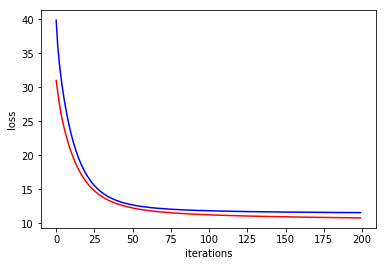

In [2]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# define objective function
def objective_fun(x):
    return np.dot(x, theta[:13].reshape(13, 1))[0][0]+b



# define loss function
def loss_fun(given_x, given_y):
    loss = 0
    for curr_x, curr_y in zip(given_x, given_y):
        curr_x = curr_x.toarray()
        loss = loss + (objective_fun(curr_x) - curr_y) ** 2

    return loss / 2


# load data set
X, y = load_svmlight_file("housing_scale")

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

theta = np.zeros(13)
b=0

learning_rate = 0.2

iteration_num = 200
train_losses = []
test_losses = []
for i in range(iteration_num):

    Gradient_theta = np.zeros(13)
    Gradient_b = 0
    for curr_x, curr_y in zip(X_train, y_train):
         curr_x = curr_x.toarray()
         # calculate gradient

         for j in range(13):
             Gradient_theta[j] = Gradient_theta[j] + (objective_fun(curr_x) - curr_y) * curr_x[0][j]

         Gradient_b = Gradient_b + (objective_fun(curr_x) - curr_y)

    for i in range(len(Gradient_theta)):
        Gradient_theta[i] = Gradient_theta[i] / y_train.size
    Gradient_b=Gradient_b/ y_train.size
    #update gradient
    theta = theta - learning_rate * Gradient_theta
    b= b - learning_rate * Gradient_b

    train_losses.append((loss_fun(X_train, y_train)/ y_train.size))
    test_losses.append(loss_fun(X_test, y_test)/ y_test.size)


plt.plot(train_losses,'b',test_losses,'r')
#蓝色为train_loss，红色为test_loss
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()